In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pprint

Pretty printing has been turned ON


# Putting the columns that I would like to import into a list

In [650]:
cols = ['DATE', 'YEAR', 'FULL TIME', 'CITY', 'REFERENCE POINT NAME', 'TOTAL CRASHES', 'TOTAL FATALITIES', 'ROAD SURFACE CONDITIONS', 'VEH 1 MV DRIVER AGE', 'LIGHTING CONDITIONS']

# Reading in the dataset to python with the specific columns

In [826]:
df = pd.read_csv('/Users/danishmehboob/Desktop/Home_Practice/datasets/Seattle Crash Data/20180208Mehboob All Rds in the City of Seattle SRFF.csv', usecols=cols)

/Users/danishmehboob/.virtualenvs/schools/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Doing some basic data analysis stuff to learn more about my dataset

In [827]:
df.head()

,CITY,REFERENCE POINT NAME,DATE,YEAR,FULL TIME,TOTAL CRASHES,TOTAL FATALITIES,ROAD SURFACE CONDITIONS,LIGHTING CONDITIONS,VEH 1 MV DRIVER AGE
0,Seattle,E PIKE ST,11/18/2017,2017,6:19 AM,1,0,Dry,Dark-Street Lights On,32.0
1,Seattle,E PIKE ST,11/18/2017,2017,5:21 AM,1,0,Dry,Dark-Street Lights On,30.0
2,Seattle,E PIKE ST,2/1/2017,2017,1:44 AM,1,0,Dry,Dark-Street Lights On,NaN
3,Seattle,E PIKE ST,3/11/2017,2017,11:30 PM,1,0,Unknown,Dark-Street Lights On,NaN
4,Seattle,E PIKE ST,5/5/2017,2017,12:53 AM,1,0,Wet,Dark-Street Lights On,NaN


In [828]:
df.shape

(12916, 10)

In [829]:
df.count()

CITY                       12916
REFERENCE POINT NAME        4102
DATE                       12916
YEAR                       12916
FULL TIME                  12916
TOTAL CRASHES              12916
TOTAL FATALITIES           12916
ROAD SURFACE CONDITIONS    12899
LIGHTING CONDITIONS        12888
VEH 1 MV DRIVER AGE        10451
dtype: int64

In [830]:
df.columns.values

array(['CITY', 'REFERENCE POINT NAME', 'DATE', 'YEAR', 'FULL TIME',
       'TOTAL CRASHES', 'TOTAL FATALITIES', 'ROAD SURFACE CONDITIONS',
       'LIGHTING CONDITIONS', 'VEH 1 MV DRIVER AGE'], dtype=object)

In [831]:
df.describe().head()

,YEAR,TOTAL CRASHES,TOTAL FATALITIES,VEH 1 MV DRIVER AGE
count,12916.0,12916.0,12916.000000,10451.000000
mean,2017.0,1.0,0.001858,38.787867
std,0.0,0.0,0.043068,16.021758
min,2017.0,1.0,0.000000,0.000000
25%,2017.0,1.0,0.000000,26.000000


In [832]:
print(df.head())

      CITY REFERENCE POINT NAME        DATE  YEAR FULL TIME  TOTAL CRASHES  \
0  Seattle            E PIKE ST  11/18/2017  2017   6:19 AM              1   
1  Seattle            E PIKE ST  11/18/2017  2017   5:21 AM              1   
2  Seattle            E PIKE ST    2/1/2017  2017   1:44 AM              1   
3  Seattle            E PIKE ST   3/11/2017  2017  11:30 PM              1   
4  Seattle            E PIKE ST    5/5/2017  2017  12:53 AM              1   

   TOTAL FATALITIES ROAD SURFACE CONDITIONS    LIGHTING CONDITIONS  \
0                 0                     Dry  Dark-Street Lights On   
1                 0                     Dry  Dark-Street Lights On   
2                 0                     Dry  Dark-Street Lights On   
3                 0                 Unknown  Dark-Street Lights On   
4                 0                     Wet  Dark-Street Lights On   

   VEH 1 MV DRIVER AGE  
0                 32.0  
1                 30.0  
2                  NaN  
3         

# Focusing on renaming some of the columns

In [689]:
df['conditions'] = df['ROAD SURFACE CONDITIONS']
df['fatalities'] = df['TOTAL FATALITIES']
df['crashes'] = df['TOTAL CRASHES']
df['time'] = df['FULL TIME']
df['location'] = df['REFERENCE POINT NAME']
df['city'] = df['CITY']
df['date'] = df['DATE']
df['age'] = df['VEH 1 MV DRIVER AGE']
df['lighting'] = df['LIGHTING CONDITIONS']
df = df.drop(columns=['REFERENCE POINT NAME', 'TOTAL FATALITIES', 'ROAD SURFACE CONDITIONS', 'TOTAL CRASHES', 'FULL TIME', 'YEAR', 'CITY', 'DATE', 'VEH 1 MV DRIVER AGE', 'LIGHTING CONDITIONS'])

# A better way of renaming columns

In [833]:
df.columns = df.columns.str.lower()

In [838]:
df.rename(columns = {'reference point name':'location', 'road surface conditions':'conditions', 'total fatalities':'fatalities', 'total crashes':'crashes', 'full time':'time', 'veh 1 mv driver age':'age', 'lighting conditions':'lighting'}, inplace=True)

In [839]:
df.columns

Index(['city', 'location', 'date', 'year', 'time', 'crashes', 'fatalities',
       'conditions', 'lighting', 'age'],
      dtype='object')

# Dropping NAN values

In [840]:
df.dropna(inplace=True)

# Getting the values for which areas have the most crashes

In [841]:
df.location.describe()

count             2771
unique             921
top       S SPOKANE ST
freq                23
Name: location, dtype: object

In [842]:
df.location.value_counts().head()

S SPOKANE ST     23
PIKE ST          18
RAINIER AVE S    18
AURORA AVE N     18
S JACKSON ST     18
Name: location, dtype: int64

### Making it easier to work with the location series in the df 

In [843]:
df.location = df.location.str.lower()
df.location.dropna(inplace = True)
df.location.head()

0      e pike st
1      e pike st
7     e aloha st
8    e blaine st
9    e boston st
Name: location, dtype: object

## Need to reset index after making above changes

In [844]:
df.reset_index().head()

,index,city,location,date,year,time,crashes,fatalities,conditions,lighting,age
0,0,Seattle,e pike st,11/18/2017,2017,6:19 AM,1,0,Dry,Dark-Street Lights On,32.0
1,1,Seattle,e pike st,11/18/2017,2017,5:21 AM,1,0,Dry,Dark-Street Lights On,30.0
2,7,Seattle,e aloha st,6/27/2017,2017,6:40 AM,1,0,Dry,Daylight,35.0
3,8,Seattle,e blaine st,12/6/2017,2017,4:18 PM,1,0,Wet,Dusk,35.0
4,9,Seattle,e boston st,1/25/2017,2017,5:22 PM,1,0,Wet,Dark-Street Lights On,28.0


# Under what conditions do the most crashes happen?"

In [845]:
df.conditions.value_counts().head()

Dry           1981
Wet            731
Snow/Slush      26
Ice             19
Unknown         10
Name: conditions, dtype: int64

## Exploring the age parameter in the df -- Seems most crashes happen when driver is in 20s

In [846]:
df.age.value_counts().head()

27.0    101
23.0     98
25.0     96
26.0     86
22.0     83
Name: age, dtype: int64

In [847]:
df.age.describe()

count    2771.000000
mean       40.048358
std        16.217915
min        12.000000
25%        27.000000
50%        37.000000
75%        51.000000
max        96.000000
Name: age, dtype: float64

# Finding the link between location and conditions

In [848]:
df.location.groupby(df.conditions).count().sort_values(ascending=False).head()

conditions
Dry           1981
Wet            731
Snow/Slush      26
Ice             19
Unknown         10
Name: location, dtype: int64

#### Just seeing whether there is any change if groupby is used one way or another

In [849]:
df.groupby(df.conditions).location.count().sort_values(ascending=False)

conditions
Dry              1981
Wet               731
Snow/Slush         26
Ice                19
Unknown            10
Other               2
Sand/Mud/Dirt       1
Oil                 1
Name: location, dtype: int64

# What conditions are usually associated with crashes in Rainier Ave S

In [850]:
df[df.location == 'rainier ave s'].describe()

,year,crashes,fatalities,age
count,18.0,18.0,18.0,18.000000
mean,2017.0,1.0,0.0,39.888889
std,0.0,0.0,0.0,18.129887
min,2017.0,1.0,0.0,16.000000
25%,2017.0,1.0,0.0,27.250000
50%,2017.0,1.0,0.0,36.500000
75%,2017.0,1.0,0.0,53.500000
max,2017.0,1.0,0.0,74.000000


In [851]:
df.conditions.describe()

count     2771
unique       8
top        Dry
freq      1981
Name: conditions, dtype: object

In [852]:
df.loc[df.location == 'rainier ave s', 'conditions'].value_counts()

Dry    10
Wet     6
Ice     2
Name: conditions, dtype: int64

# What ages crash most in Rainier Ave S

In [853]:
df[df.location == 'rainier ave s'].groupby(df.age).count()

,city,location,date,year,time,crashes,fatalities,conditions,lighting,age
age,,,,,,,,,,
16.0,1,1,1,1,1,1,1,1,1,1
17.0,1,1,1,1,1,1,1,1,1,1
19.0,1,1,1,1,1,1,1,1,1,1
22.0,1,1,1,1,1,1,1,1,1,1
27.0,1,1,1,1,1,1,1,1,1,1
28.0,1,1,1,1,1,1,1,1,1,1
29.0,1,1,1,1,1,1,1,1,1,1
30.0,1,1,1,1,1,1,1,1,1,1
35.0,1,1,1,1,1,1,1,1,1,1


### The average age seems to be around 39-40 yrs old

In [854]:
df.loc[df.location == 'rainier ave s', 'age'].agg(['mean', 'min', 'max', 'count'])

mean     39.888889
min      16.000000
max      74.000000
count    18.000000
Name: age, dtype: float64

# What conditions are usually associated with crashes in S Spokane Street

In [855]:
df.location.describe()

count             2771
unique             921
top       s spokane st
freq                23
Name: location, dtype: object

In [856]:
df.conditions.describe()

count     2771
unique       8
top        Dry
freq      1981
Name: conditions, dtype: object

In [857]:
df.loc[df.location == 's spokane st', 'conditions'].value_counts()

Dry    15
Wet     8
Name: conditions, dtype: int64

# What ages crash most in S Spokane St?

In [858]:
df[df['location']=='s spokane st'].groupby(df['age']).count()

,city,location,date,year,time,crashes,fatalities,conditions,lighting,age
age,,,,,,,,,,
16.0,1,1,1,1,1,1,1,1,1,1
19.0,1,1,1,1,1,1,1,1,1,1
21.0,1,1,1,1,1,1,1,1,1,1
25.0,1,1,1,1,1,1,1,1,1,1
27.0,1,1,1,1,1,1,1,1,1,1
31.0,1,1,1,1,1,1,1,1,1,1
34.0,2,2,2,2,2,2,2,2,2,2
40.0,1,1,1,1,1,1,1,1,1,1
42.0,1,1,1,1,1,1,1,1,1,1


### The average age seems to be around 43 yrs

In [859]:
df.loc[df.location == 's spokane st', 'age'].describe()

count    23.000000
mean     43.217391
std      15.216488
min      16.000000
25%      32.500000
50%      46.000000
75%      54.500000
max      73.000000
Name: age, dtype: float64

## Practice boolean indexing/selection

In [860]:
so = df['location'].head()

In [861]:
so

0      e pike st
1      e pike st
7     e aloha st
8    e blaine st
9    e boston st
Name: location, dtype: object

In [862]:
criterea = [True, False, True, False, True]

In [863]:
so[criterea]

0      e pike st
7     e aloha st
9    e boston st
Name: location, dtype: object

# Finding the link between conditions and age

In [864]:
age_conditions = df['age'].groupby(df['conditions']).count().sort_values(ascending=False)

In [865]:
conditions_under_30 = df[df['age']==30].groupby(df['conditions']).count().dropna()

In [866]:
age_conditions.head()

conditions
Dry           1981
Wet            731
Snow/Slush      26
Ice             19
Unknown         10
Name: age, dtype: int64

In [867]:
conditions_under_30

,city,location,date,year,time,crashes,fatalities,conditions,lighting,age
conditions,,,,,,,,,,
Dry,50,50,50,50,50,50,50,50,50,50
Wet,16,16,16,16,16,16,16,16,16,16


# What else can playing around with the age column tell us?

In [868]:
df['time'].value_counts().head()

11:30 AM    11
1:00 PM     11
12:00 PM    10
8:55 AM     10
4:40 PM      9
Name: time, dtype: int64

In [869]:
age_27 = df.loc[df.age == 27, 'time']

In [870]:
age_27.describe()

count          101
unique          99
top       12:33 PM
freq             2
Name: time, dtype: object

In [871]:
age_27.groupby(df.conditions).describe()

,count,unique,top,freq
conditions,,,,
Dry,76,75,12:33 PM,2
Snow/Slush,1,1,4:00 AM,1
Wet,24,23,7:10 AM,2


In [872]:
age_50 = df.loc[df.age==50, 'time']

In [873]:
age_50.describe()

count          30
unique         30
top       2:43 PM
freq            1
Name: time, dtype: object

In [874]:
age_50.groupby(df.conditions).describe()

,count,unique,top,freq
conditions,,,,
Dry,18,18,12:45 PM,1
Wet,12,12,1:15 PM,1


# Plotting results

In [144]:
plt.style.use('fivethirtyeight')

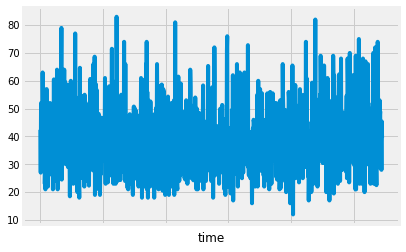

In [686]:
df.groupby(df.time).age.mean().plot()

(array([2.000e+00, 0.000e+00, 2.170e+02, 1.646e+03, 1.995e+03, 1.499e+03,
        1.165e+03, 9.340e+02, 8.530e+02, 8.150e+02, 5.600e+02, 3.760e+02,
        2.120e+02, 1.120e+02, 4.000e+01, 2.200e+01, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0.  ,   5.95,  11.9 ,  17.85,  23.8 ,  29.75,  35.7 ,  41.65,
         47.6 ,  53.55,  59.5 ,  65.45,  71.4 ,  77.35,  83.3 ,  89.25,
         95.2 , 101.15, 107.1 , 113.05, 119.  ]),
 <a list of 20 Patch objects>)

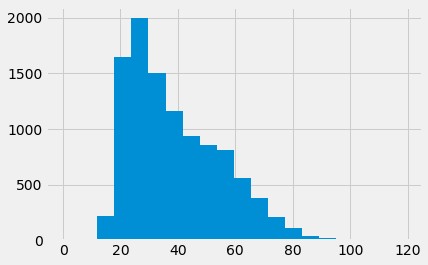

In [149]:
plt.hist(df['age'].dropna(), bins=20)

In [805]:
df.columns.str.lower()

Index(['conditions', 'fatalities', 'crashes', 'time', 'location', 'city',
       'date', 'age', 'lighting', 'conditions_num'],
      dtype='object')

location
False    Axes(0.08,0.125;0.87x0.755)
True     Axes(0.08,0.125;0.87x0.755)
Name: age, dtype: object

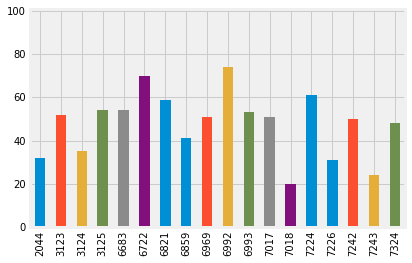

In [758]:
df.groupby(df.location == 'rainier ave s').age.plot(kind='bar', sort_columns=True)

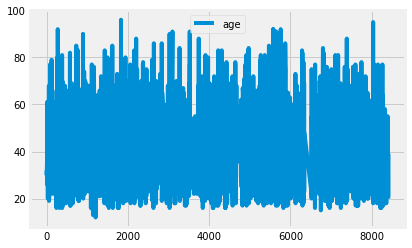

In [879]:
df.age.plot()
plt.legend()
plt.show()

In [877]:
df.columns

Index(['city', 'location', 'date', 'year', 'time', 'crashes', 'fatalities',
       'conditions', 'lighting', 'age'],
      dtype='object')